In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("IndividualDetails.csv")
data=df[["age","gender","detected_state"]]

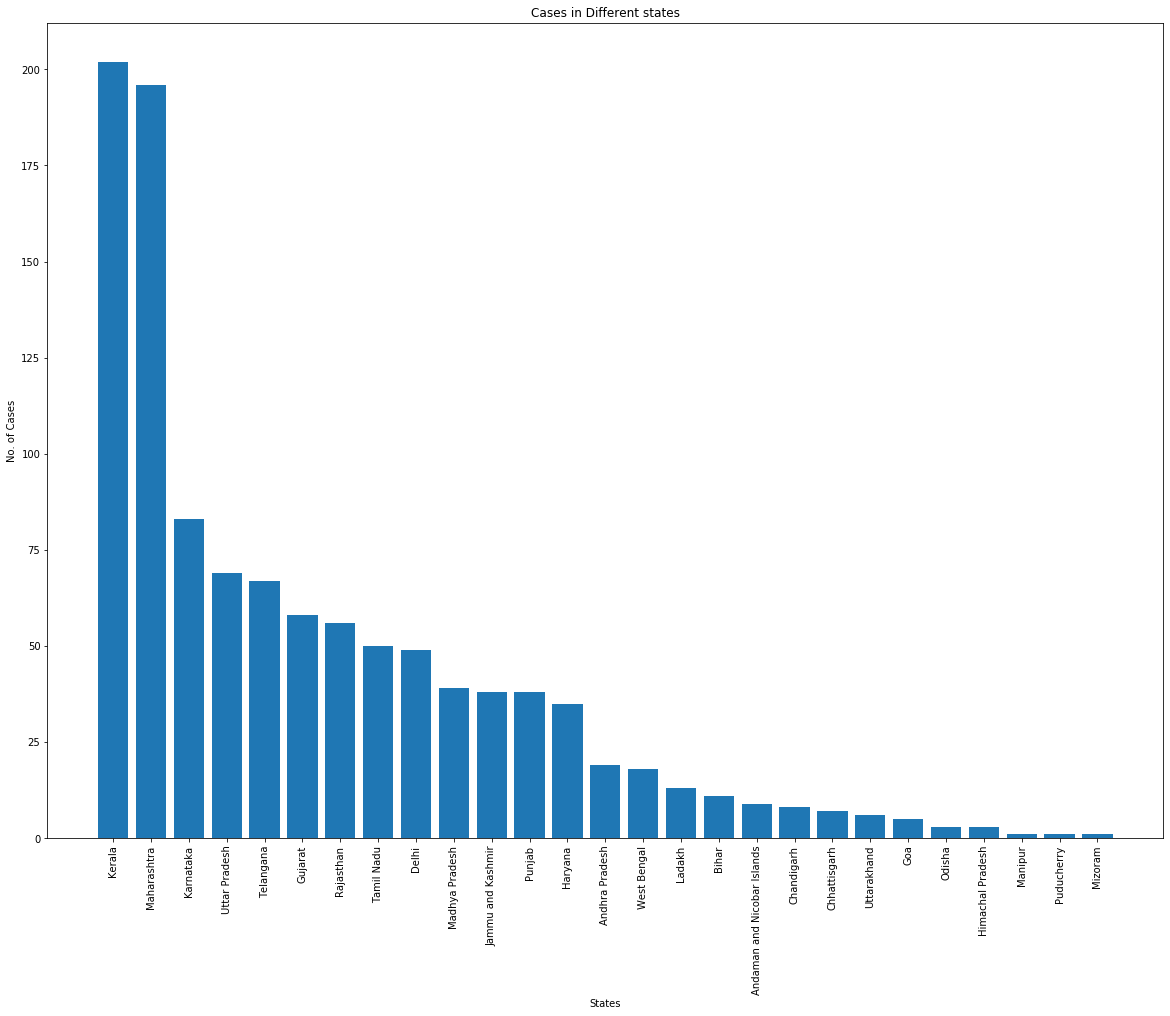

In [3]:
# First Visualization
count=data['detected_state'].value_counts()
x=np.arange(len(count))
xt=list(count.index)
plt.figure(figsize=(20,15))
plt.bar(x,count)
plt.xticks(x,xt,rotation=90)
plt.xlabel("States")
plt.ylabel("No. of Cases")
plt.title("Cases in Different states")
plt.show()

In [4]:
statedata=data[['detected_state']].dropna()

In [15]:
state_num=np.arange(len(data['detected_state'].dropna()))
state_num
statedata['stateCount']=state_num
state1=pd.DataFrame(statedata.loc[statedata['detected_state']=='Kerala',['stateCount'] ])
state2=pd.DataFrame(statedata.loc[statedata['detected_state']=='Maharashtra',['stateCount'] ])
state3=pd.DataFrame(statedata.loc[statedata['detected_state']=='Karnataka',['stateCount'] ])
state4=pd.DataFrame(statedata.loc[statedata['detected_state']=='Uttar Pradesh',['stateCount'] ])
state5=pd.DataFrame(statedata.loc[statedata['detected_state']=='Telangana',['stateCount'] ])

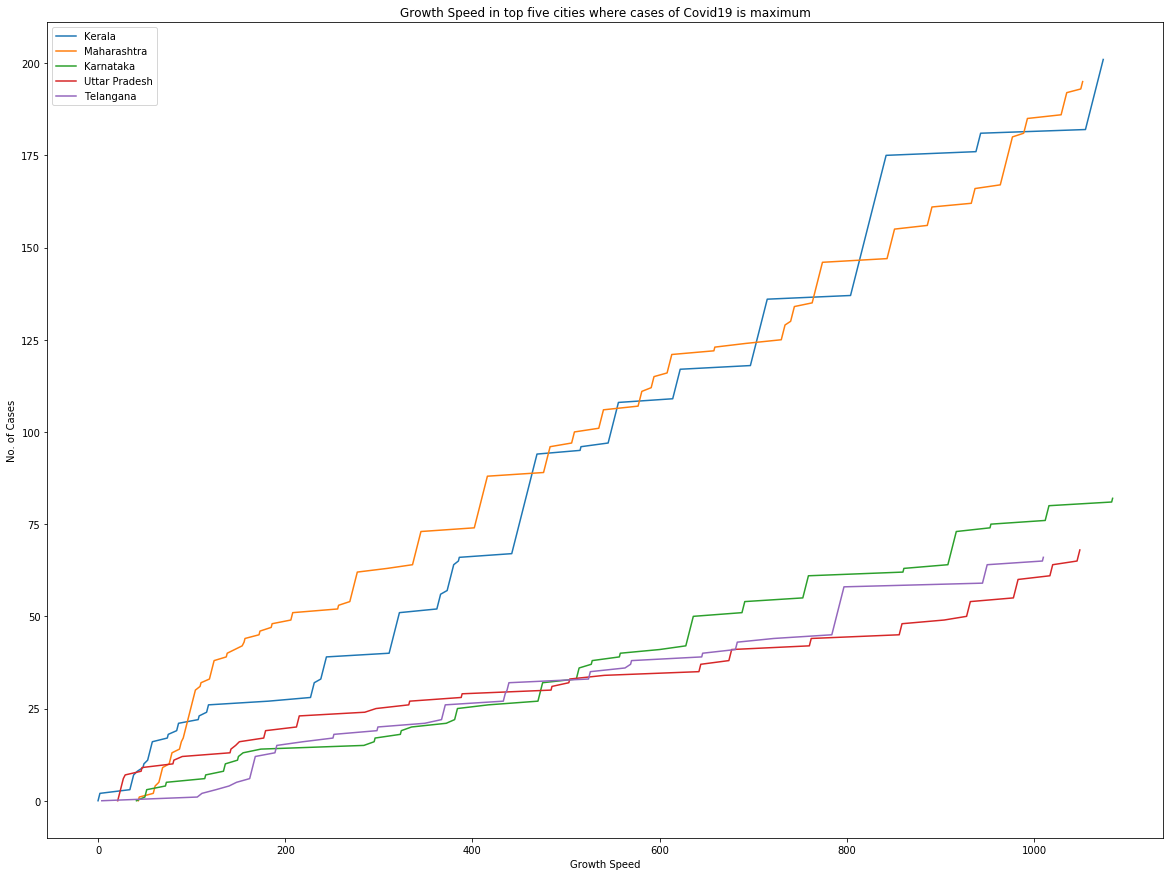

In [41]:
plt.figure(figsize=(20,15))
plt.plot(state1['stateCount'],np.arange(len(state1)),label="Kerala")
plt.plot(state2['stateCount'],np.arange(len(state2)),label='Maharashtra')
plt.plot(state3['stateCount'],np.arange(len(state3)),label='Karnataka')
plt.plot(state4['stateCount'],np.arange(len(state4)),label='Uttar Pradesh')
plt.plot(state5['stateCount'],np.arange(len(state5)),label='Telangana')
plt.xlabel("Growth Speed")
plt.ylabel("No. of Cases")
plt.title("Growth Speed in top five cities where cases of Covid19 is maximum")
plt.legend()

In [7]:
# Second Visualization
stgen=data[['detected_state','gender']].dropna()
female=pd.DataFrame(stgen.loc[stgen["gender"]=='F',['detected_state','gender']])
fe_count=pd.DataFrame(female['detected_state'].value_counts())
fe_count.columns=["count"]
x_axes=list(fe_count.index)
fe_count['detected_state']=x_axes
fe_count=fe_count.sort_values("detected_state")

male=pd.DataFrame(stgen.loc[stgen["gender"]=='M',['detected_state','gender']])
m_count=pd.DataFrame(male['detected_state'].value_counts())
m_count.columns=["count"]
xm_axes=list(m_count.index)
m_count['detected_state']=xm_axes
m_count=m_count.sort_values("detected_state")



lst=list(stgen['detected_state'].drop_duplicates())
fe={'detected_state':[],'count':[]}
ma={'detected_state':[],'count':[]}
for i in lst:
    if((str(i).strip() in fe_count['detected_state']) and (str(i).strip() not in m_count['detected_state'])):
        ma['detected_state'].append(i)
        ma['count'].append(0)   
    if((str(i).strip() not in fe_count['detected_state']) and (str(i).strip() in m_count['detected_state'])):
        fe['detected_state'].append(i)
        fe['count'].append(0)
dtf=pd.DataFrame(fe)
dtm=pd.DataFrame(ma)
fe_count=fe_count.append(dtf,ignore_index=True)
fe_count
m_count=m_count.append(dtm,ignore_index=True)



fe_count=fe_count.sort_values("detected_state")
m_count=m_count.sort_values("detected_state")
xm_axes=list(m_count.index)


E:\Anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


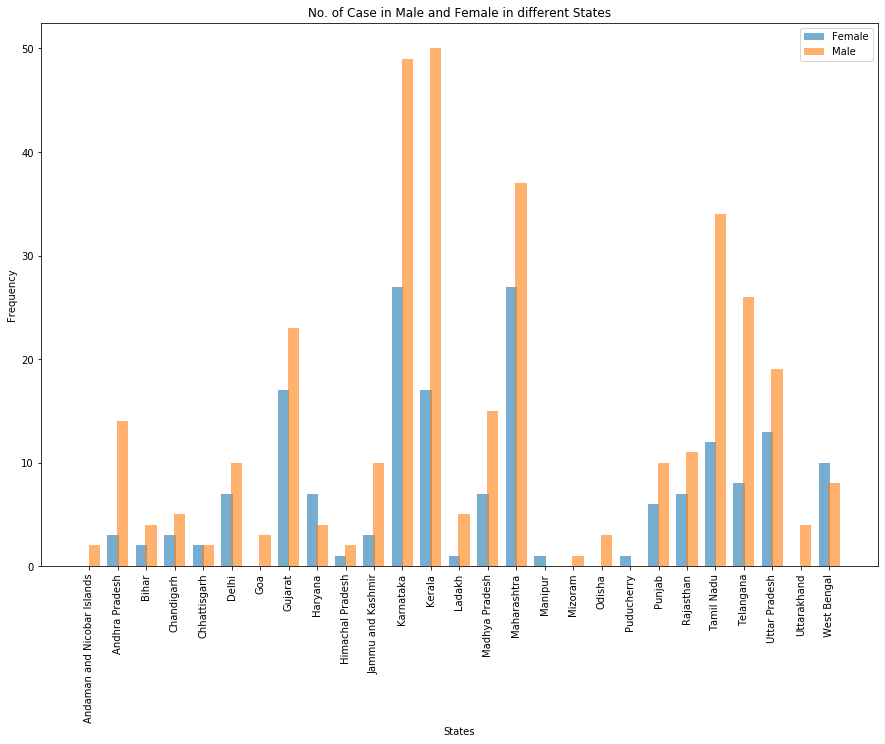

In [39]:
plt.figure(figsize=(15,10))
x_axis=np.arange(len(fe_count))
xm_axis=np.arange(len(m_count))

plt.bar(xm_axis-0.17,fe_count["count"],alpha=.6,label='Female',width=0.4)
plt.bar(xm_axis+0.17,m_count["count"],alpha=.6,label='Male',width=0.4)
plt.xticks(xm_axis,list(m_count['detected_state']),rotation=90)
plt.xlabel("States")
plt.ylabel("Frequency")
plt.title("No. of Case in Male and Female in different States")
plt.legend()
plt.show()
